___

<a href='https://mp.weixin.qq.com/mp/appmsgalbum?__biz=Mzg2OTU4NzI3NQ==&action=getalbum&album_id=1764511202329624577&scene=126#wechat_redirect'> <img src=../../../../pic/project_logo.jpg></a>
___

# Missing Data

处理 pandas 中缺失数据的便捷方法

⚠️先说说 None/NaN 的区别

In [2]:
import numpy as np
import pandas as pd

In [5]:
# Pandas automatically converts the None to a NaN value. 
# (Be aware that there is a proposal to add a native integer NA to Pandas in the future; as of this writing, it has not been included)
df = pd.DataFrame({'A':[1,2,None], 
                  'B':[5,np.nan,np.nan],
                  'C':[1,2,3]})

In [6]:
None_arr = np.array([1, None, 3, 4])
None_arr

array([1, None, 3, 4], dtype=object)

In [7]:
NaN_arr = np.array([1, np.NaN, 3, 4])
NaN_arr.dtype

dtype('float64')

https://stackoverflow.com/questions/17534106/what-is-the-difference-between-nan-and-none

|Typeclass     | Conversion When Storing NAs | NA Sentinel Value      |
|--------------|-----------------------------|------------------------|
| ``floating`` | No change                   | ``np.nan``             |
| ``object``   | No change                   | ``None`` or ``np.nan`` |
| ``integer``  | Cast to ``float64``         | ``np.nan``             |
| ``boolean``  | Cast to ``object``          | ``None`` or ``np.nan`` |


Rubin在1976年把缺失值归为3类：
1. Missing Completely at Random（MCAR）
2. Missing at Random（MAR）
3. Missing NOT at Random（MNAR）

1. Missing Completely at Random（MCAR）

MCAR是指缺失值产生的原因完全随机，我们无法通过其他已知数据预测该缺失值。

2. Missing at Random（MAR）

MAR指的是缺失值可以用其他的列解释并预测。比如：你求婚失败了，你不知道为啥，那么你可能要关注一下其他的因子（变量），“她是否爱上别人了？”或者“老丈母娘不喜欢你”等等。

3. Missing NOT at Random（MNAR）

MNAR表示缺失值的产生有所原因，比如：一个人很胖，所以他不愿意提供自己的体重。

## 缺失值查看

介绍检查缺失值的简易方法：

- isnull()
- notnull()

In [8]:
df.isnull()

,A,B,C
0,False,False,False
1,False,True,False
2,True,True,False


In [9]:
df.notnull()

,A,B,C
0,True,True,True
1,True,False,True
2,False,False,True


In [12]:
round(df.isnull().sum()/df.shape[0],2)

A    0.33
B    0.67
C    0.00
dtype: float64

In [13]:
df.isnull().sum()/df.shape[0]

A    0.333333
B    0.666667
C    0.000000
dtype: float64

In [14]:
df.isnull().sum(axis=1)/df.shape[1]

0    0.000000
1    0.333333
2    0.666667
dtype: float64

## 缺失值移除

一般缺失值占比在50%左右即可drop

In [15]:
df1 = df.copy()

In [16]:
df1.dropna() # 默认drop axis是行

,A,B,C
0,1.0,5.0,1


In [17]:
df1.dropna(axis=1)

,C
0,1
1,2
2,3


In [18]:
df1.dropna(axis='columns') # 跟上面一样

,C
0,1
1,2
2,3


In [19]:
df1  # inplace 没有设置成 True，所以对 df1 没有原地操作，不影响 df1 本身！

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [20]:
df1.dropna(axis=0)

,A,B,C
0,1.0,5.0,1


In [21]:
df.dropna(thresh=2)

# thresh=2 -- keep only the rows having 2 or more valid data

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2


## 缺失值填充

介绍几个填充缺失值的常用方法：

- fillna
- replace

In [22]:
df2 = df.copy()

In [23]:
# 固定值填充
df2.fillna(value='填充') 

,A,B,C
0,1.0,5.0,1
1,2.0,填充,2
2,填充,填充,3


In [24]:
# method='ffill'
df2.fillna(method = 'ffill') # 根据前一个值填充，如果第一个值就是nan，那此方法不适用。

,A,B,C
0,1.0,5.0,1
1,2.0,5.0,2
2,2.0,5.0,3


In [25]:
# method='bfill'
df2.fillna(method = 'bfill') # 根据前一个值填充，如果最后的就是nan，那此方法不适用。

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [26]:
# replace
df2.replace(np.nan, -1)

,A,B,C
0,1.0,5.0,1
1,2.0,-1.0,2
2,-1.0,-1.0,3


In [27]:
# SimpleImputer

from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='mean') #for median imputation replace 'mean' with 'median'
imp_mean.fit(df)
imputed_df = imp_mean.transform(df)  # return array

In [28]:
imputed_df

array([[1. , 5. , 1. ],
       [2. , 5. , 2. ],
       [1.5, 5. , 3. ]])

## 针对时间序列

In [36]:
# 重新构造一个df
data = pd.DataFrame(
    np.array([x for x in range(100)]*4).ravel().reshape(4,100).T + np.random.randint(1,5,(100,4)),
    columns = 'A B C D'.split(),
    index = pd.date_range('2022-01-01',periods = 100)
)

In [31]:
cond = (data>10) & (data<20) | (data>40) & (data<50) | (data>75) & (data<90)
data_mask = data.mask(cond)

# return an object of same shape as self and whose corresponding entries 
# are from self where cond is False and otherwise are from other object

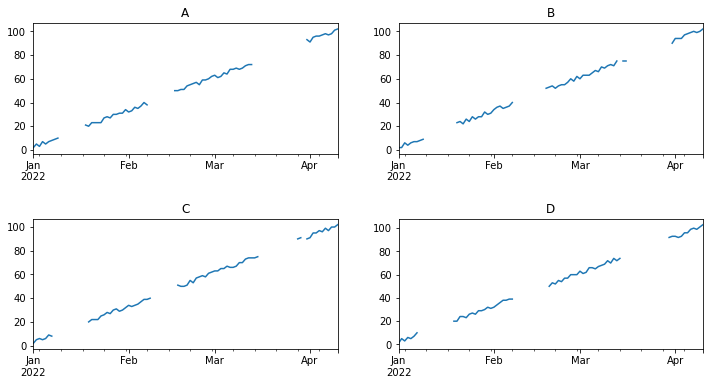

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplots_adjust(hspace=0.5) #  hspace - adjust the height of the Padding between subplots

for n, col in enumerate(data_mask.columns):
    ax = plt.subplot(2, 2, n + 1)
    data_mask[col].plot(ax=ax)
    ax.set_title(col.upper())

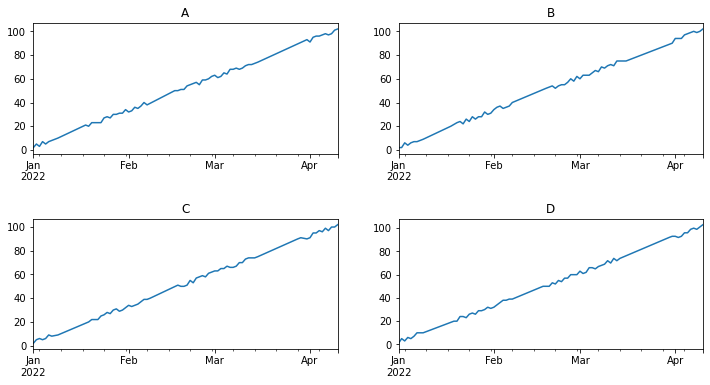

In [39]:
plt.figure(figsize=(12, 6))
plt.subplots_adjust(hspace=0.5)

data_inteplate = data_mask.interpolate() #interpolate - used to fill NA values in the dataframe or series
for n, col in enumerate(data_inteplate.columns):
    ax = plt.subplot(2, 2, n + 1)
    data_inteplate[col].plot(ax=ax)
    ax.set_title(col.upper())

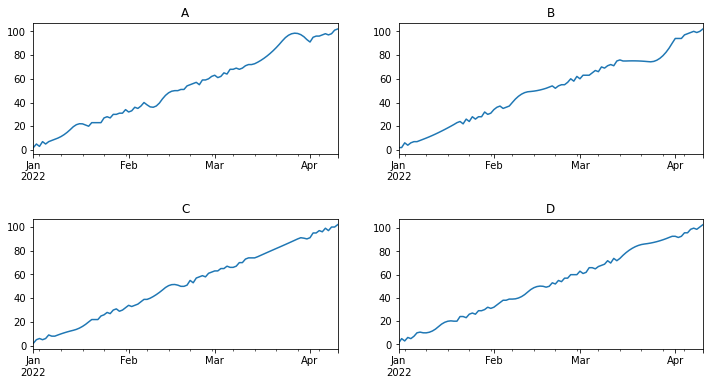

In [40]:
plt.figure(figsize=(12, 6))
plt.subplots_adjust(hspace=0.5)

data_inteplate = data_mask.interpolate(method='polynomial', order=2)
# polynomial interpolation is filling missing values with the lowest 
# possible degree that passes through available data points. 
# The polynomial Interpolation curve is like the trigonometric sin 
# curve or assumes it like a parabola shape. 
for n, col in enumerate(data_inteplate.columns):
    ax = plt.subplot(2, 2, n + 1)
    data_inteplate[col].plot(ax=ax)
    ax.set_title(col.upper())

## Impyute

In [43]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from math import sqrt
import random
import numpy as np
random.seed(0)

#Fetching the dataset
import pandas as pd
dataset = fetch_california_housing()
train, target = pd.DataFrame(dataset.data), pd.DataFrame(dataset.target)
train.columns = ['0','1','2','3','4','5','6','7']

# insert target column into train dataset at the index of 8
train.insert(loc=len(train.columns), column='target', value=target)

#Randomly replace 40% of the first column with NaN values
column = train['0']
print(column.size)
missing_pct = int(column.size * 0.4)
i = [random.choice(range(column.shape[0])) for _ in range(missing_pct)]
column[i] = np.NaN

20640


In [45]:
import sys
from impyute.imputation.cs import fast_knn
sys.setrecursionlimit(100000) #Increase the recursion limit of the OS

# start the KNN training
imputed_training_impyute=fast_knn(train.values, k=30)

In [46]:
imputed_training_impyute

array([[   3.30117882,   41.        ,    6.98412698, ...,   37.88      ,
        -122.23      ,    4.526     ],
       [   8.3014    ,   21.        ,    6.23813708, ...,   37.86      ,
        -122.22      ,    3.585     ],
       [   4.31326938,   52.        ,    8.28813559, ...,   37.85      ,
        -122.24      ,    3.521     ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,   39.43      ,
        -121.22      ,    0.923     ],
       [   3.40189346,   18.        ,    5.32951289, ...,   39.43      ,
        -121.32      ,    0.847     ],
       [   2.3886    ,   16.        ,    5.25471698, ...,   39.37      ,
        -121.24      ,    0.894     ]])

In [47]:
from impyute.imputation.cs import mice
imputed_training_MICE=mice(train.values)

In [48]:
imputed_training_MICE

array([[   7.04291115,   41.        ,    6.98412698, ...,   37.88      ,
        -122.23      ,    4.526     ],
       [   8.3014    ,   21.        ,    6.23813708, ...,   37.86      ,
        -122.22      ,    3.585     ],
       [   6.93190085,   52.        ,    8.28813559, ...,   37.85      ,
        -122.24      ,    3.521     ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,   39.43      ,
        -121.22      ,    0.923     ],
       [   2.39225991,   18.        ,    5.32951289, ...,   39.43      ,
        -121.32      ,    0.847     ],
       [   2.3886    ,   16.        ,    5.25471698, ...,   39.37      ,
        -121.24      ,    0.894     ]])

In [49]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=30)
imputer.fit(train)
# transform the dataset
imputed_training_KNNImputer = imputer.transform(train)

In [50]:
imputed_training_KNNImputer

array([[   3.11527667,   41.        ,    6.98412698, ...,   37.88      ,
        -122.23      ,    4.526     ],
       [   8.3014    ,   21.        ,    6.23813708, ...,   37.86      ,
        -122.22      ,    3.585     ],
       [   4.33347333,   52.        ,    8.28813559, ...,   37.85      ,
        -122.24      ,    3.521     ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,   39.43      ,
        -121.22      ,    0.923     ],
       [   3.64121333,   18.        ,    5.32951289, ...,   39.43      ,
        -121.32      ,    0.847     ],
       [   2.3886    ,   16.        ,    5.25471698, ...,   39.37      ,
        -121.24      ,    0.894     ]])

## Algorithms that Support Missing Values

![](../../../pic/missing_value_algo.png)

# Great Job!